In [1]:
import numpy as np
from enum import Enum
from typing import List
import random
import math
from utils import *

In [2]:
# Make all lists into numpy arrays for speed
# Add mean and std deviation functions for teams
# Get all opinions for a team

In [3]:
# OTHER DIST OPTION
# np.random.uniform
teamADist = Distribution(
    mean = -0.5,
    std_dev = 0.25,
    lower_bound = -1,
    upper_bound = 0,
    dist_func = np.random.normal
)

teamBDist = Distribution(
    mean = 0.5,
    std_dev = 0.25,
    lower_bound = 0,
    upper_bound = 1,
    dist_func = np.random.normal
)

# teamA, teamB = generateAgents(teamADist, teamBDist, agentsPerTeam=100)

In [4]:
teamA, teamB = generateAgents(teamADist, teamBDist, agentsPerTeam=100)
import time 

import itertools

FRACTION_MOVE = np.arange(0.1, 0.7, 0.1)
TOLERANCE = np.arange(0.1, 1, .1)

# FRACTION_MOVE = [0.1]
# TOLERANCE = [0.6]
# Compute all combinations of FRACTION_MOVE and TOLERANCE
combinations = list(itertools.product(FRACTION_MOVE, TOLERANCE))
print(combinations)

# Print combinations
histories = []
for index, (fraction, tolerance) in enumerate(combinations):
    # fraction = 0.1
    combo_str = f"Fraction: {fraction}, Tolerance: {tolerance}"
    print(f"Combination: {index+1}/{len(combinations)} - {combo_str}")
    start = time.time()
    history = sim(teamA, teamB, 30, fraction, tolerance, 0.5)
    
    histories.append((combo_str, history))
    
    elapsed_time = time.time() - start

    print("Time: ", elapsed_time)

# start = time.time()
# history = sim(teamA, teamB, 25, FRACTION_MOVE, TOLERANCE)
# elapsed_time = time.time() - start

# print("Time: ", elapsed_time)

[(0.1, 0.1), (0.1, 0.2), (0.1, 0.30000000000000004), (0.1, 0.4), (0.1, 0.5), (0.1, 0.6), (0.1, 0.7000000000000001), (0.1, 0.8), (0.1, 0.9), (0.2, 0.1), (0.2, 0.2), (0.2, 0.30000000000000004), (0.2, 0.4), (0.2, 0.5), (0.2, 0.6), (0.2, 0.7000000000000001), (0.2, 0.8), (0.2, 0.9), (0.30000000000000004, 0.1), (0.30000000000000004, 0.2), (0.30000000000000004, 0.30000000000000004), (0.30000000000000004, 0.4), (0.30000000000000004, 0.5), (0.30000000000000004, 0.6), (0.30000000000000004, 0.7000000000000001), (0.30000000000000004, 0.8), (0.30000000000000004, 0.9), (0.4, 0.1), (0.4, 0.2), (0.4, 0.30000000000000004), (0.4, 0.4), (0.4, 0.5), (0.4, 0.6), (0.4, 0.7000000000000001), (0.4, 0.8), (0.4, 0.9), (0.5, 0.1), (0.5, 0.2), (0.5, 0.30000000000000004), (0.5, 0.4), (0.5, 0.5), (0.5, 0.6), (0.5, 0.7000000000000001), (0.5, 0.8), (0.5, 0.9), (0.6, 0.1), (0.6, 0.2), (0.6, 0.30000000000000004), (0.6, 0.4), (0.6, 0.5), (0.6, 0.6), (0.6, 0.7000000000000001), (0.6, 0.8), (0.6, 0.9)]
Combination: 1/54 - F

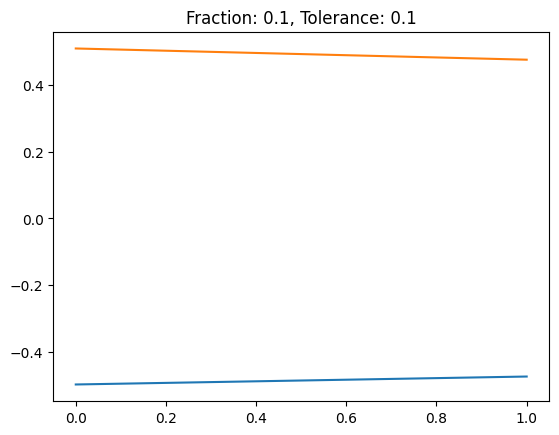

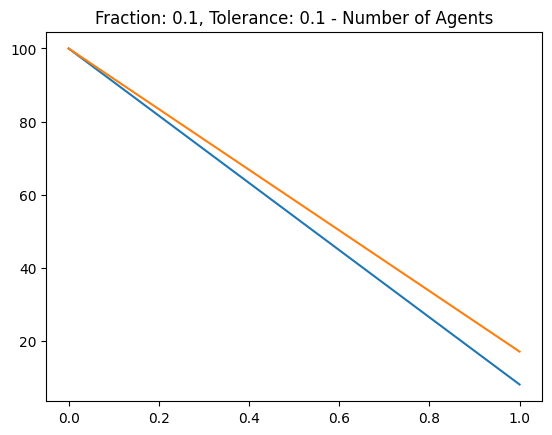

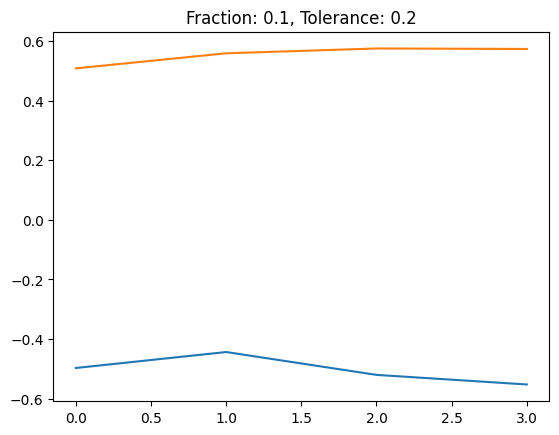

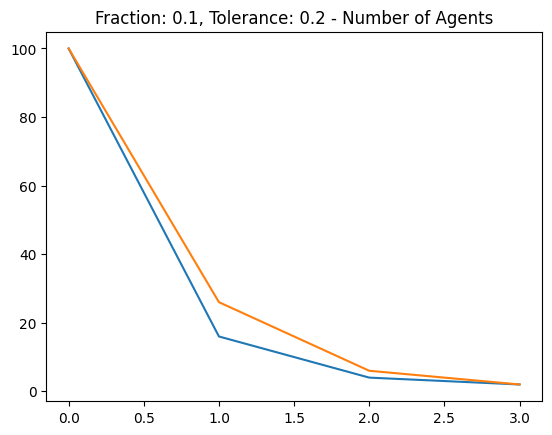

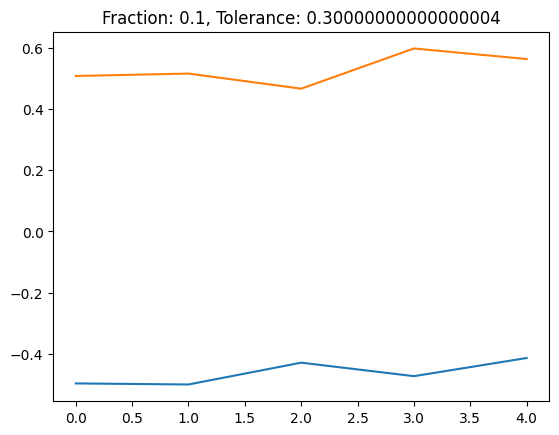

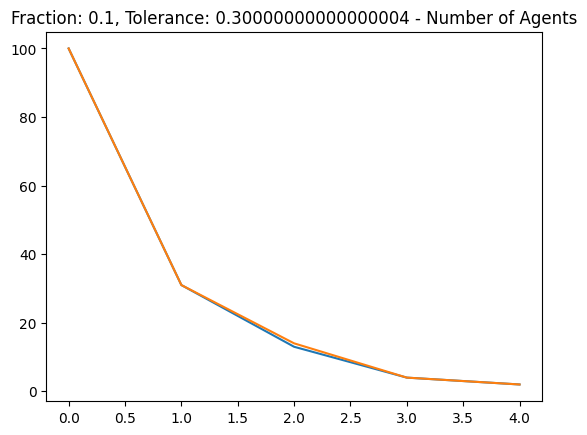

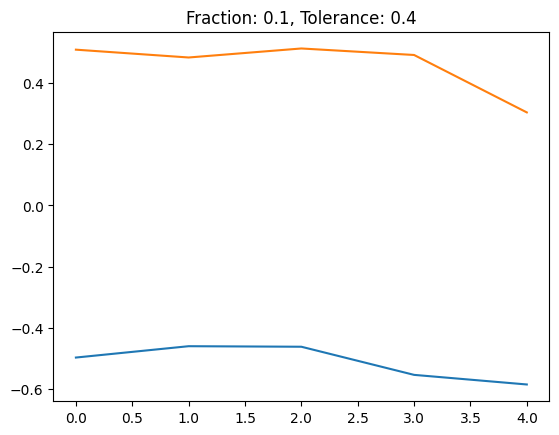

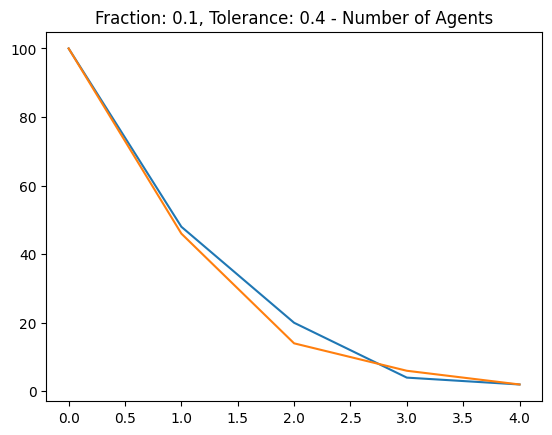

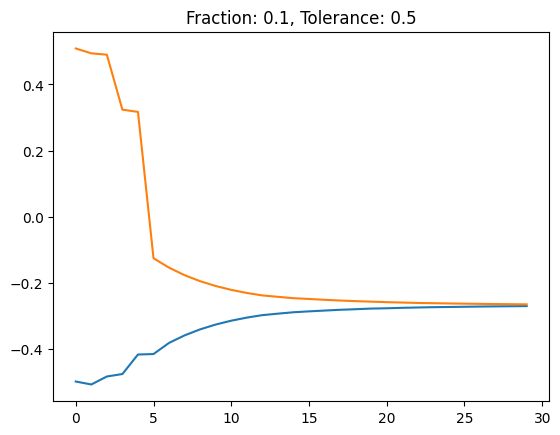

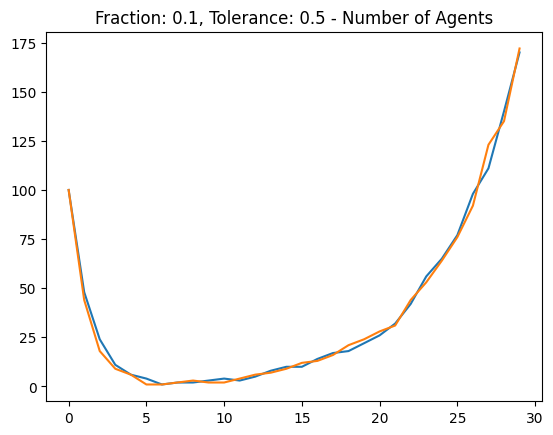

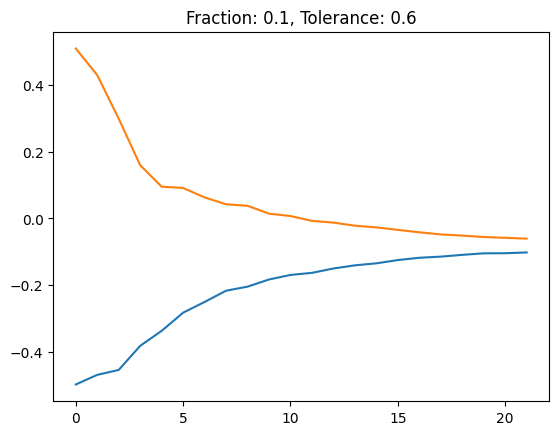

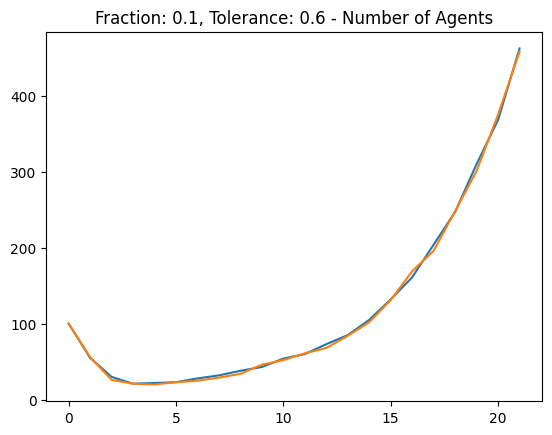

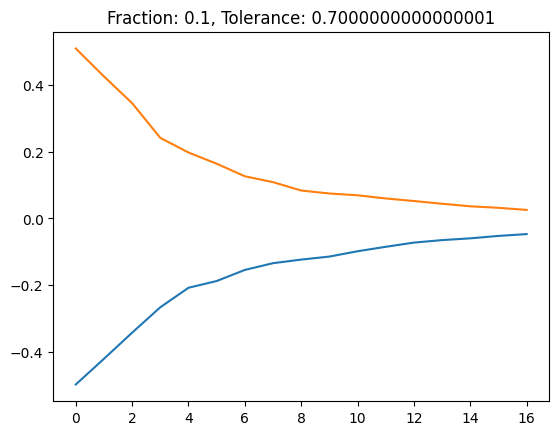

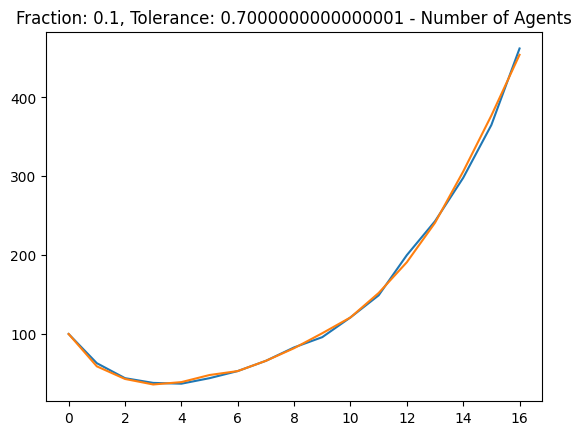

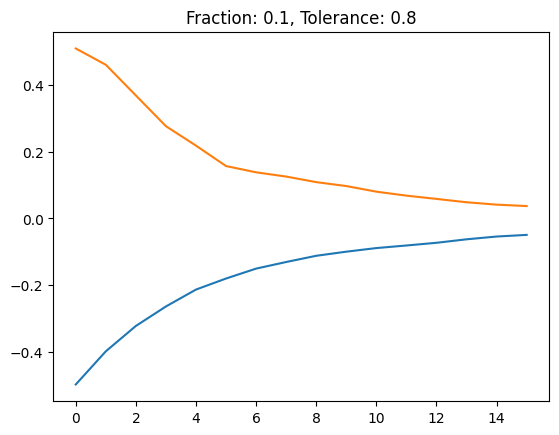

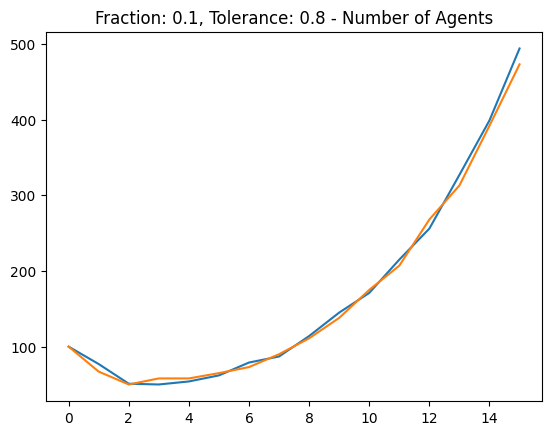

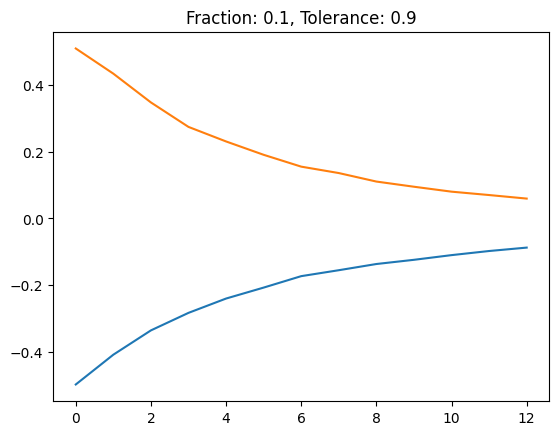

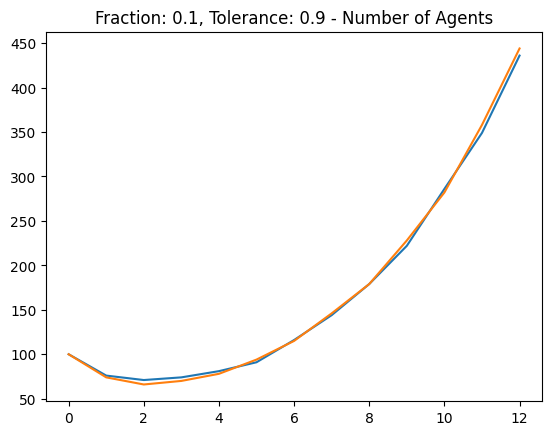

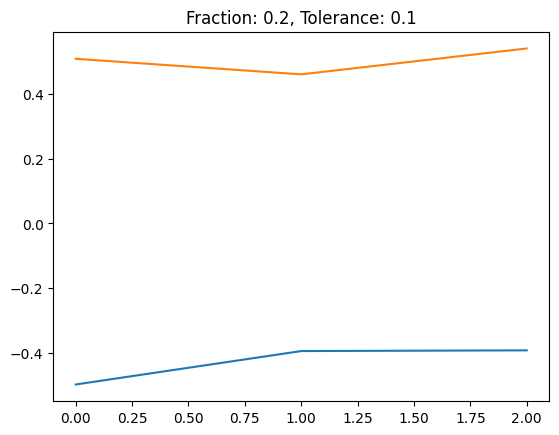

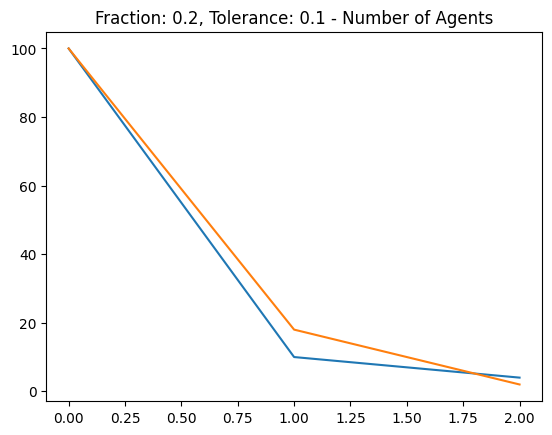

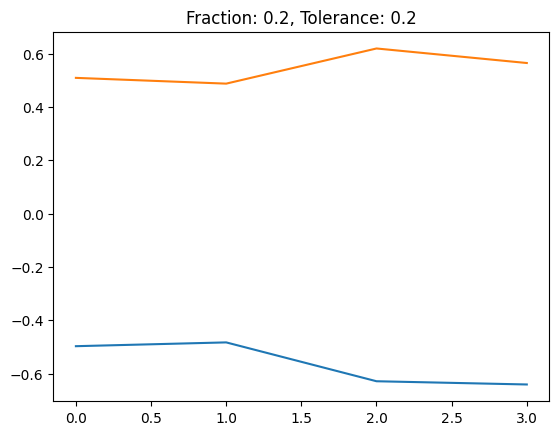

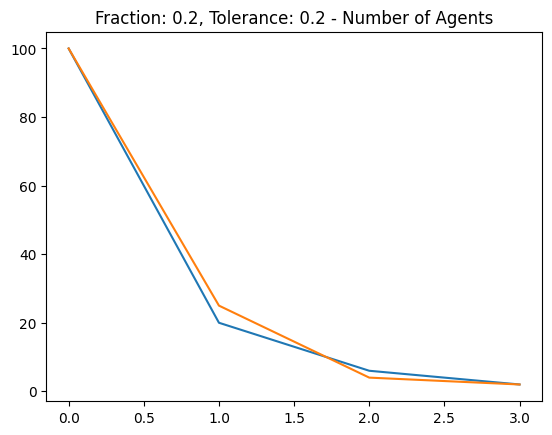

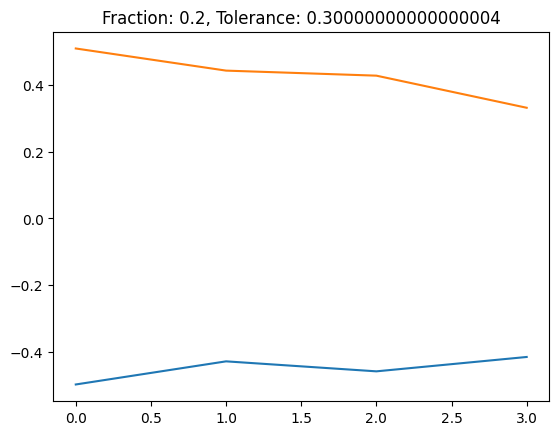

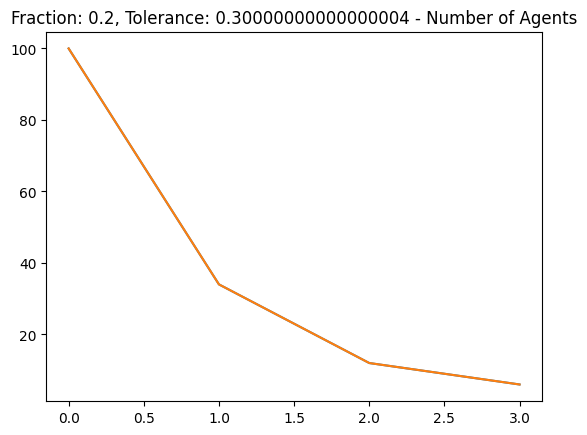

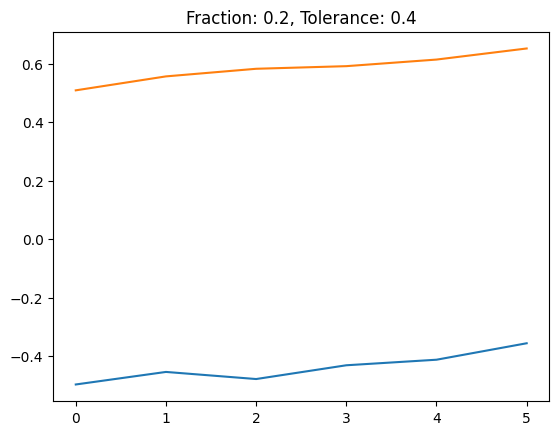

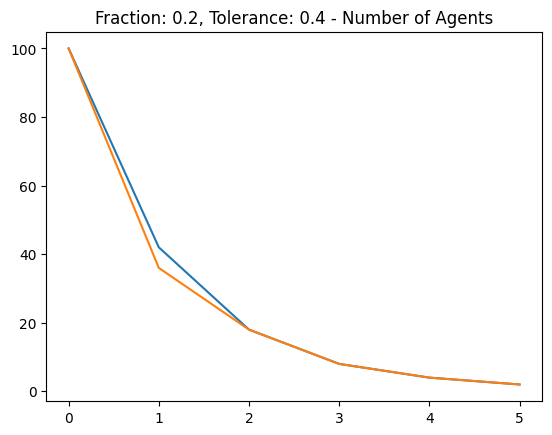

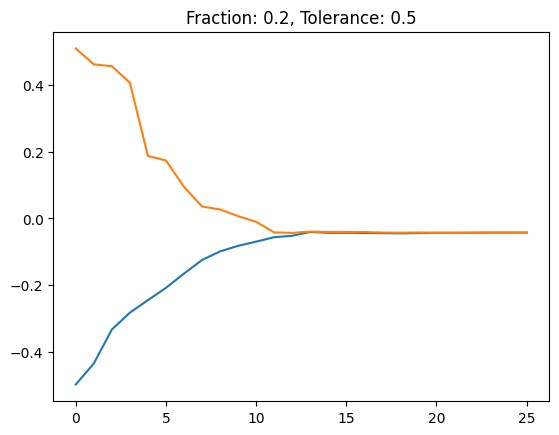

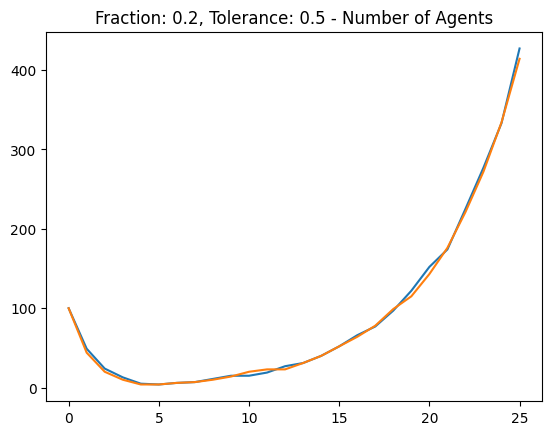

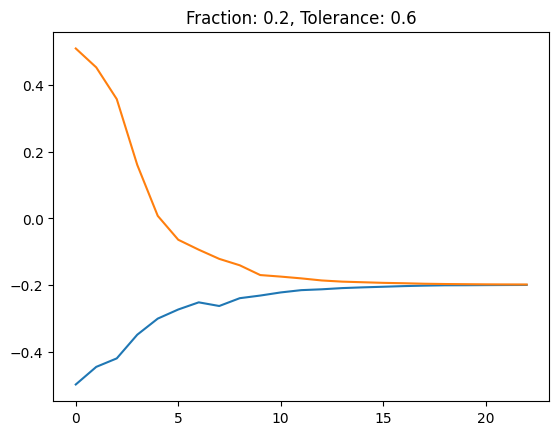

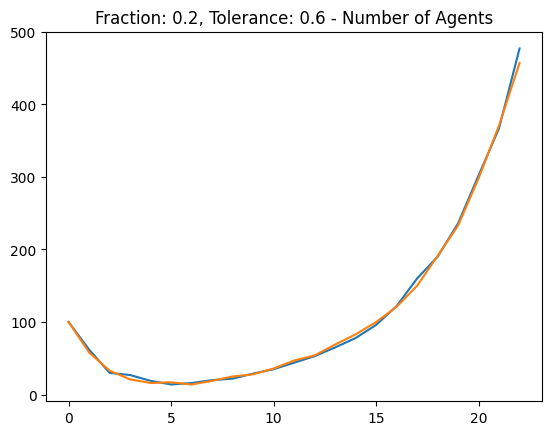

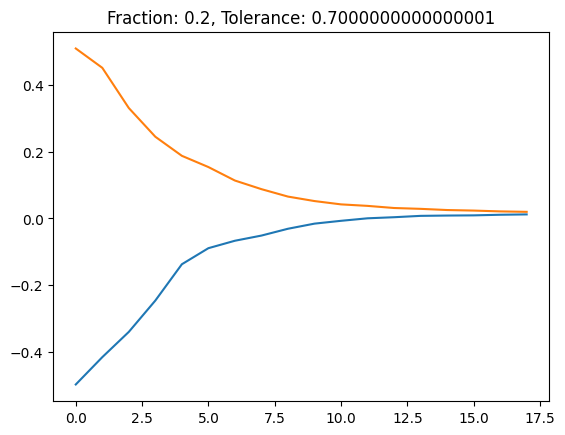

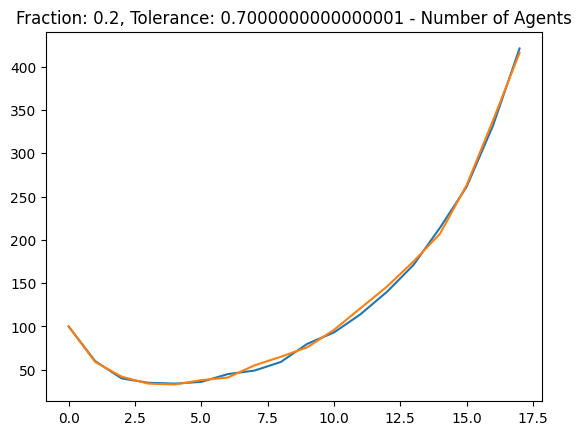

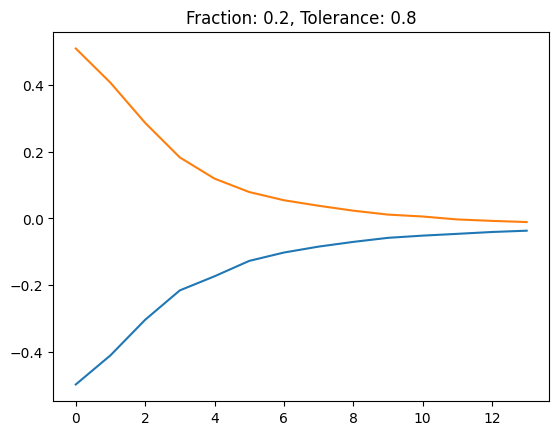

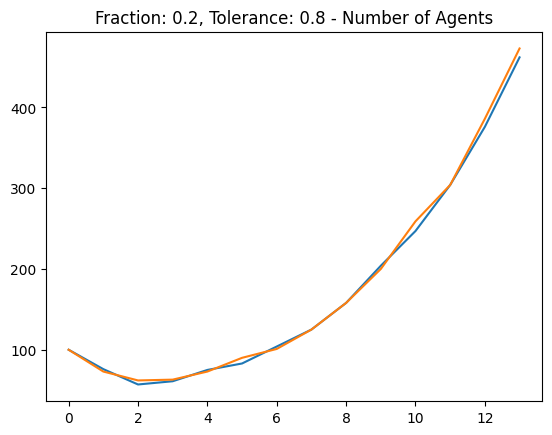

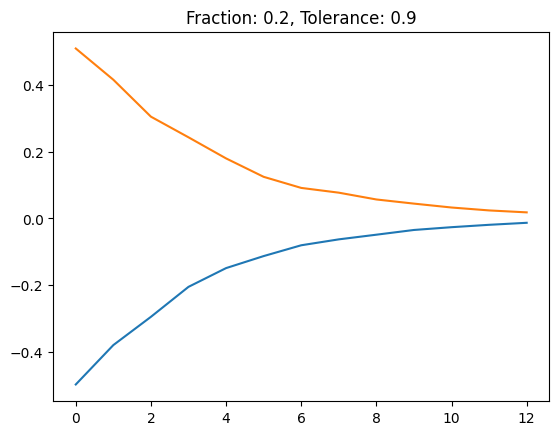

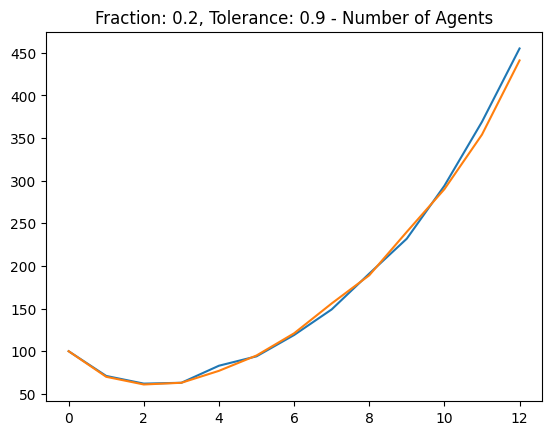

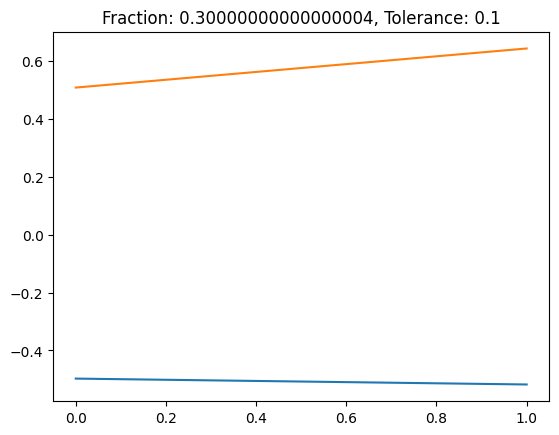

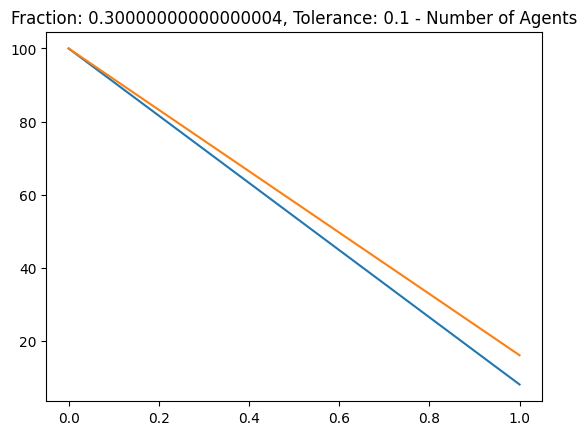

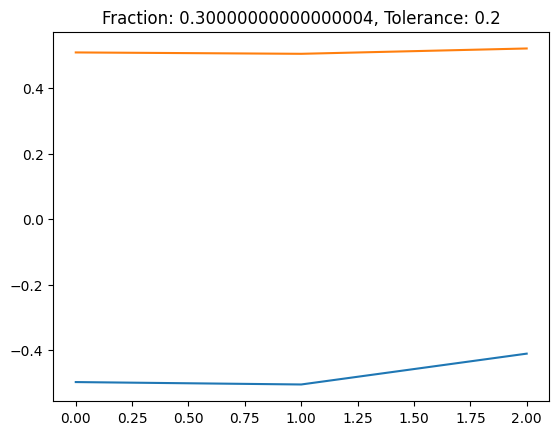

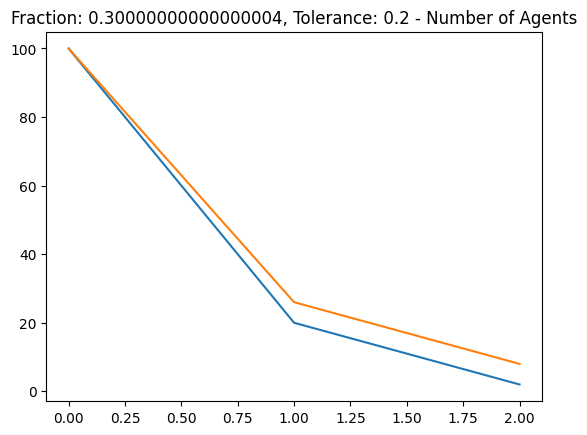

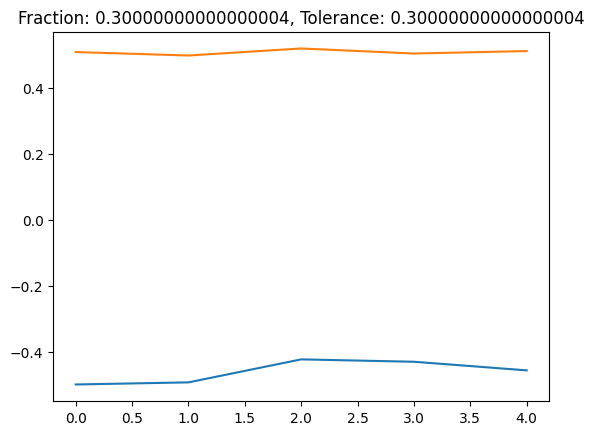

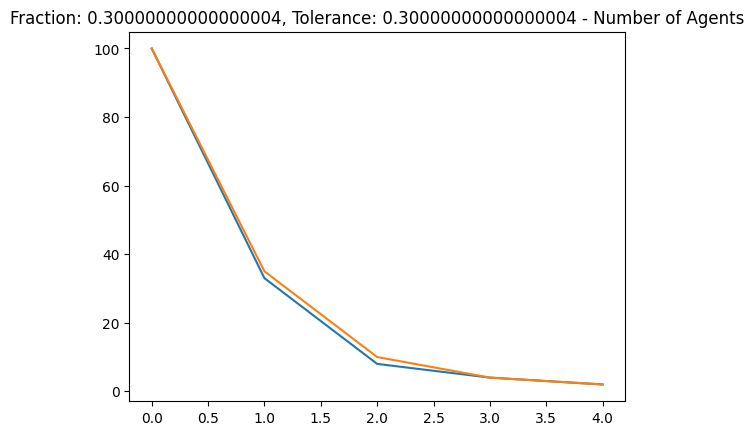

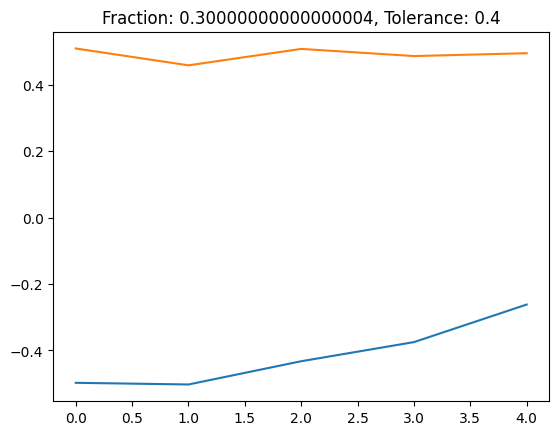

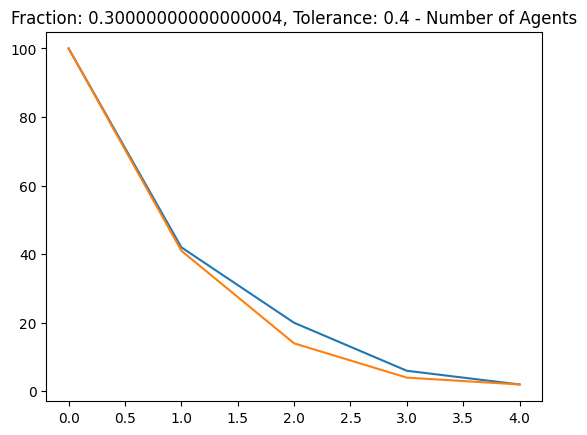

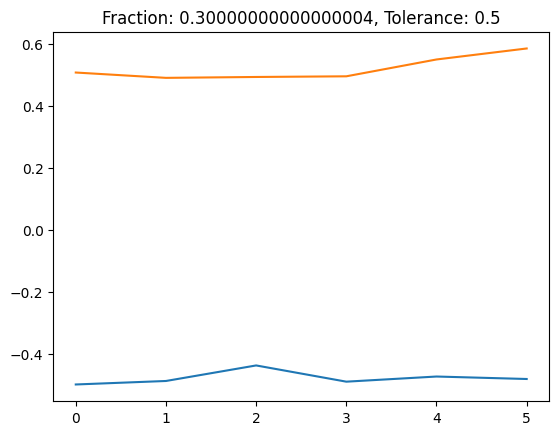

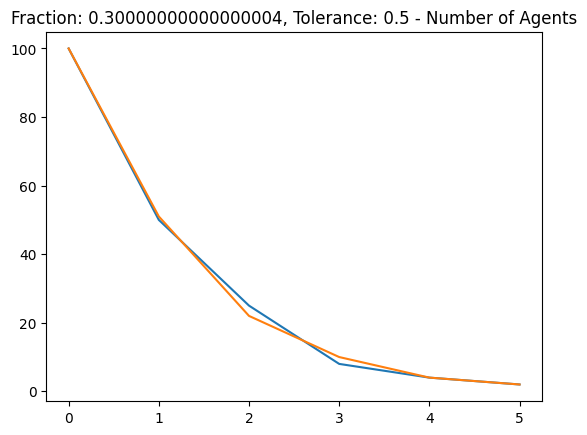

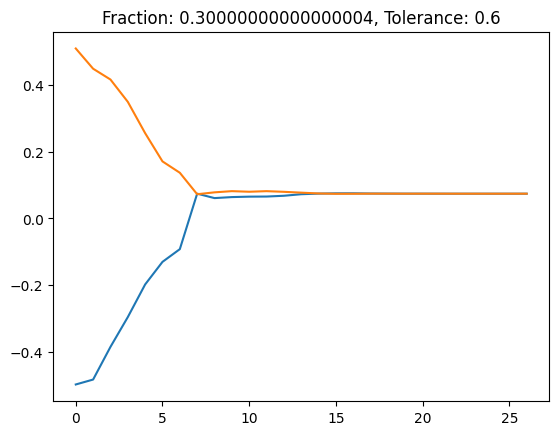

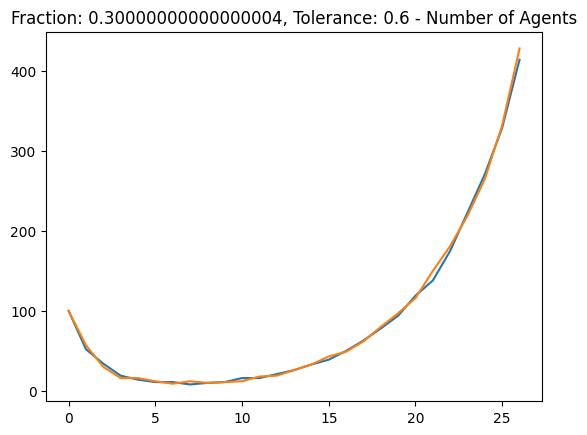

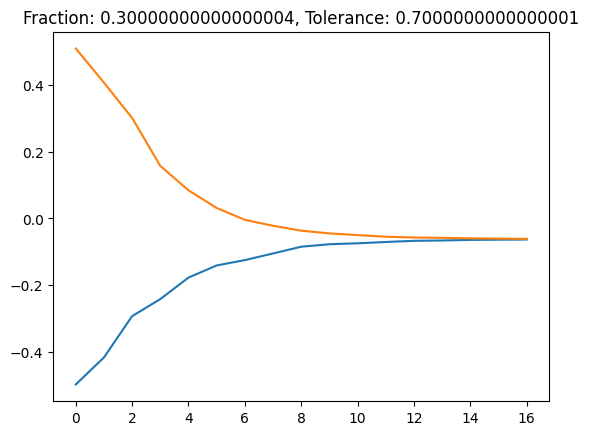

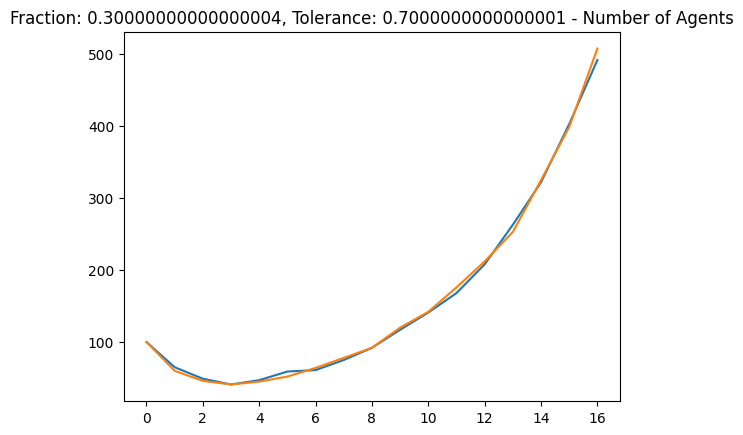

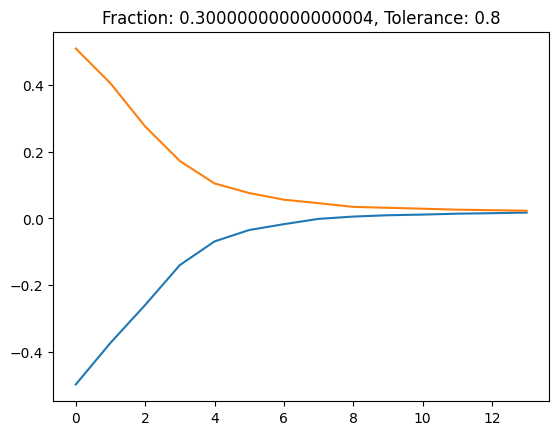

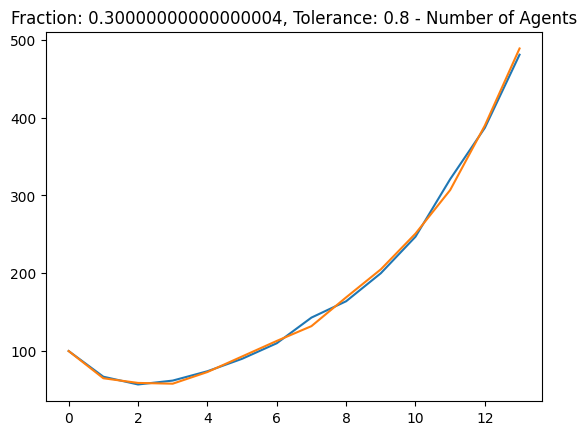

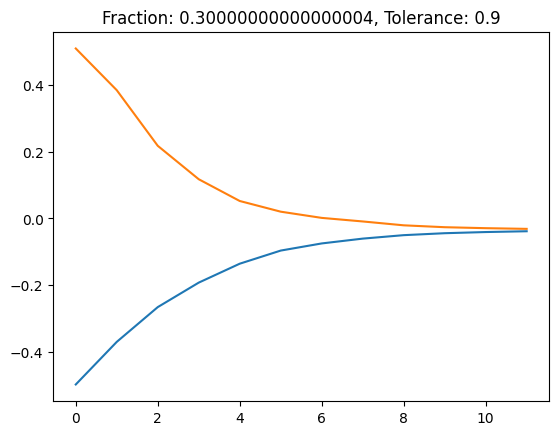

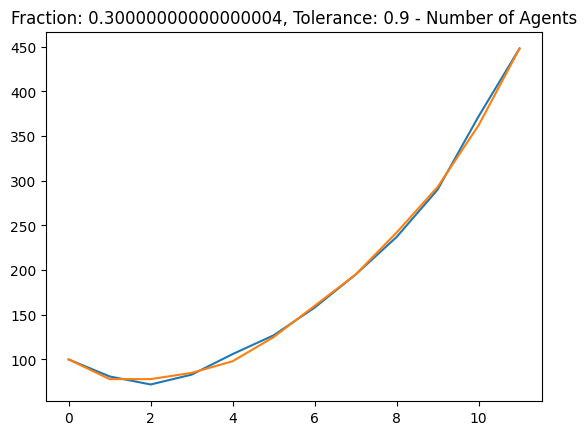

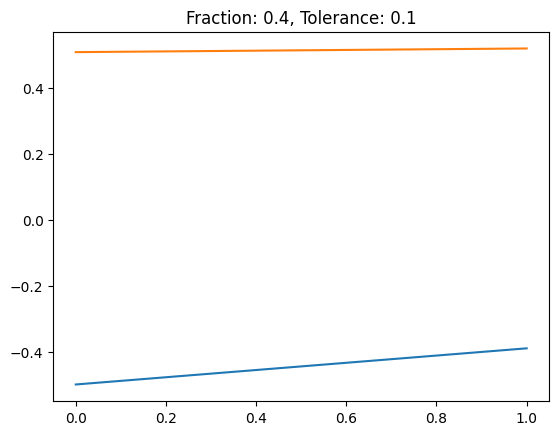

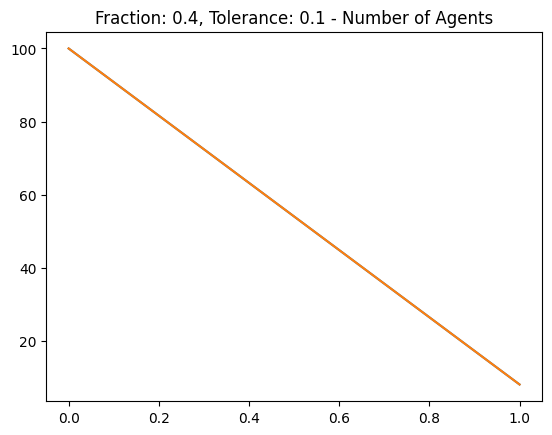

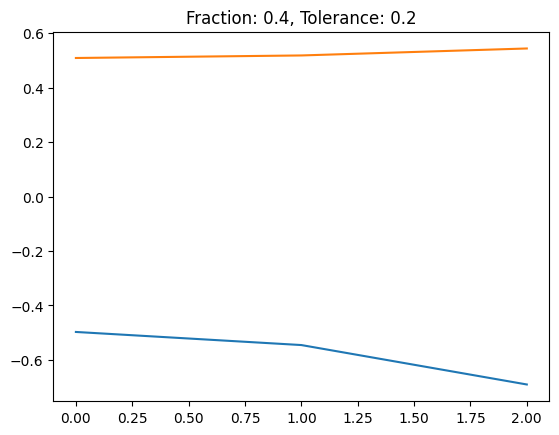

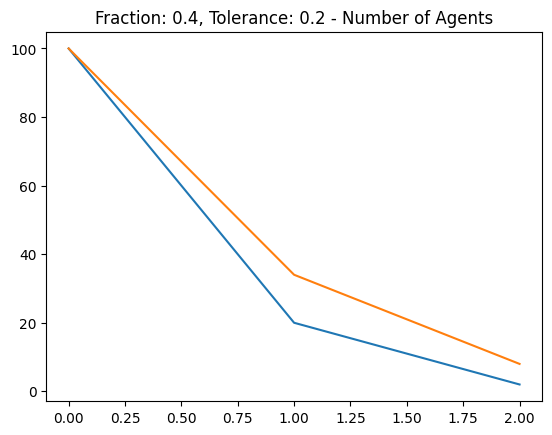

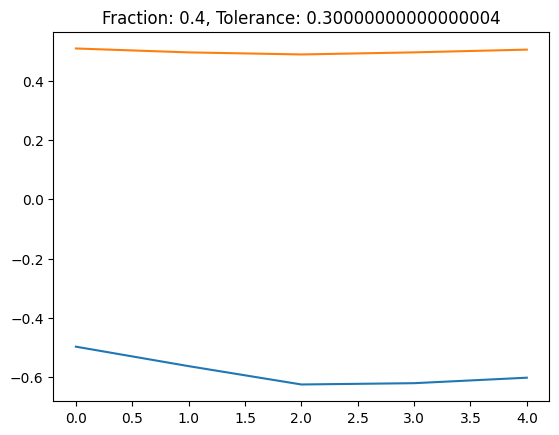

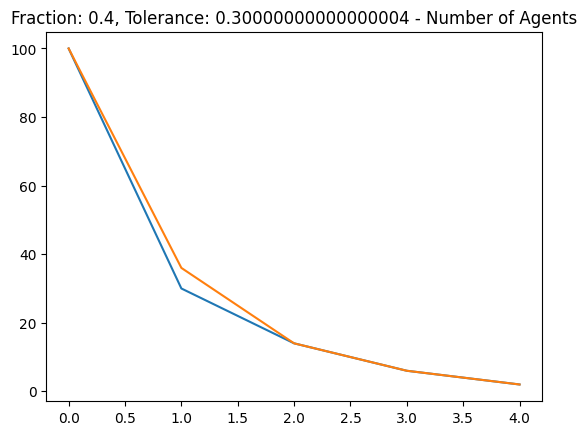

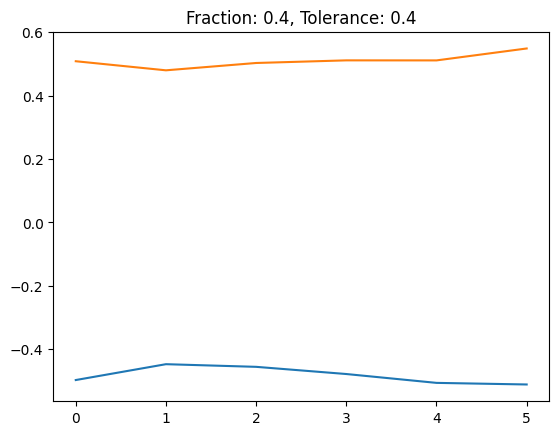

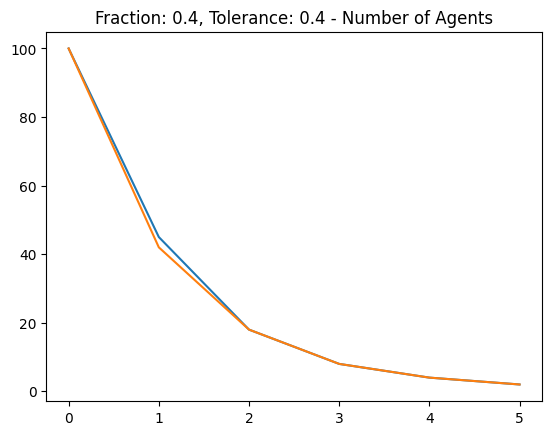

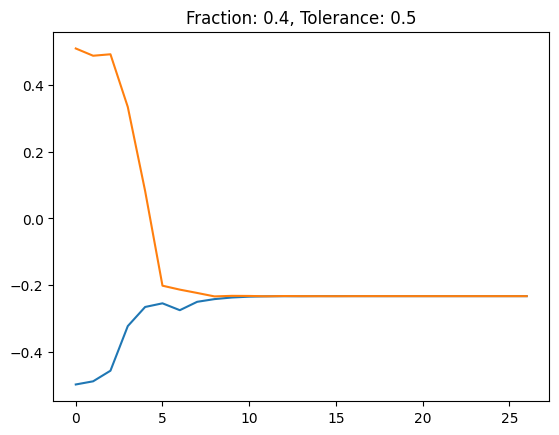

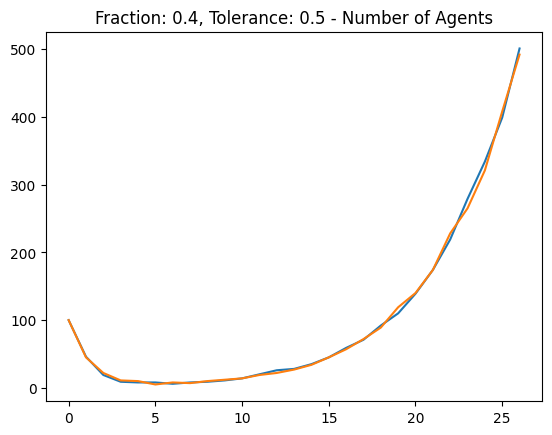

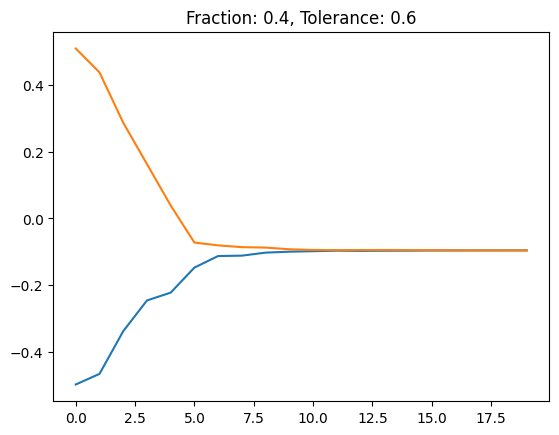

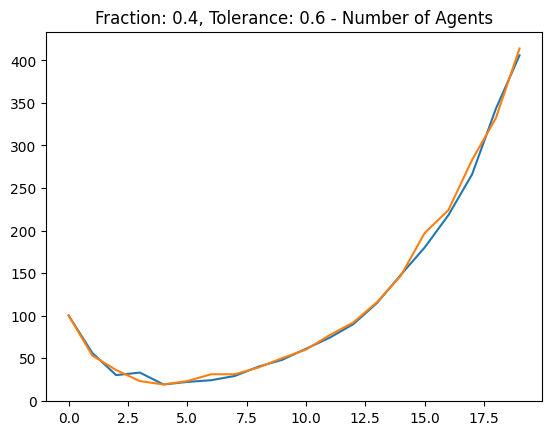

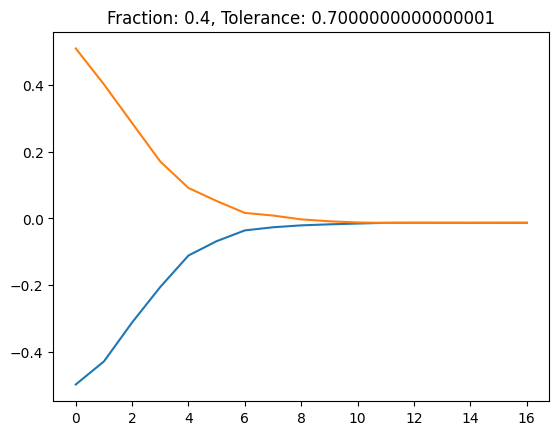

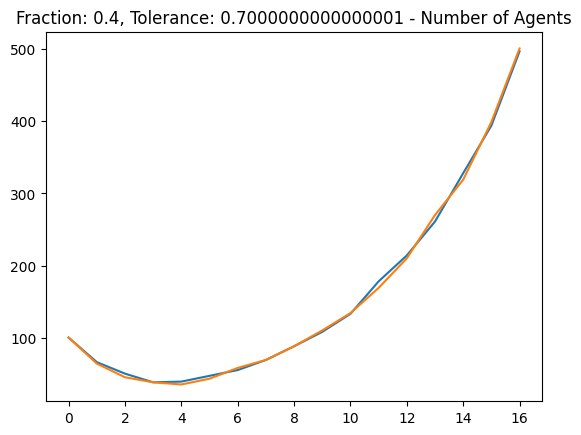

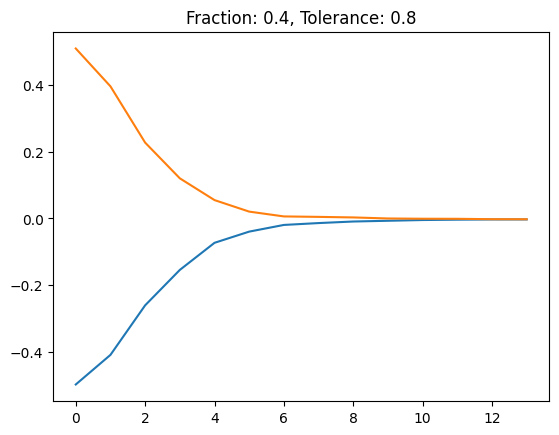

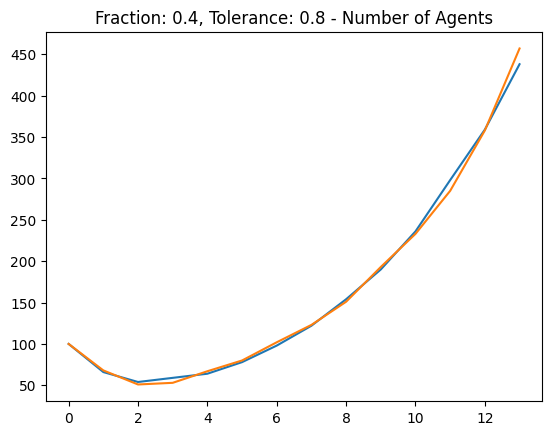

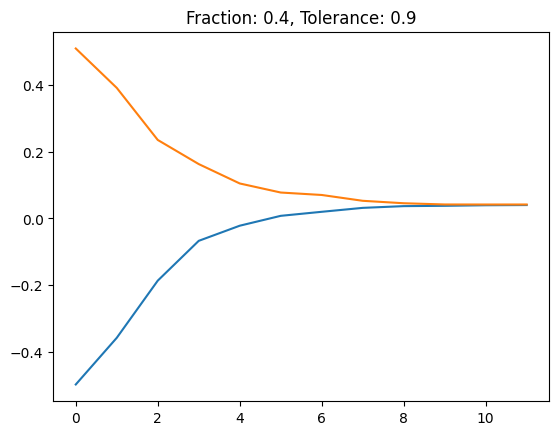

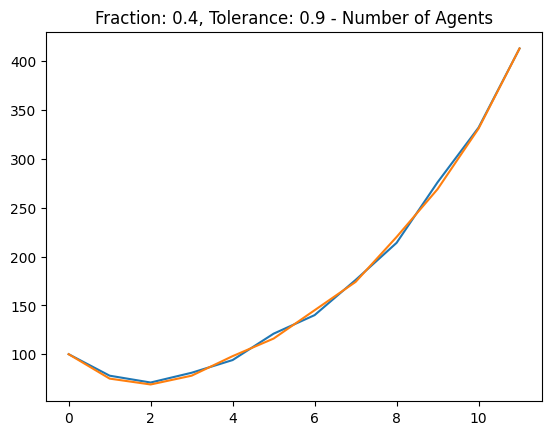

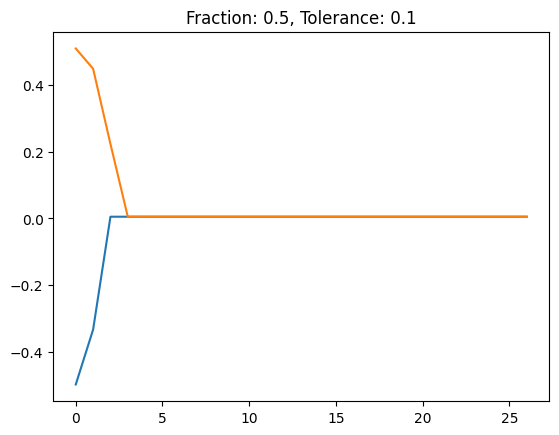

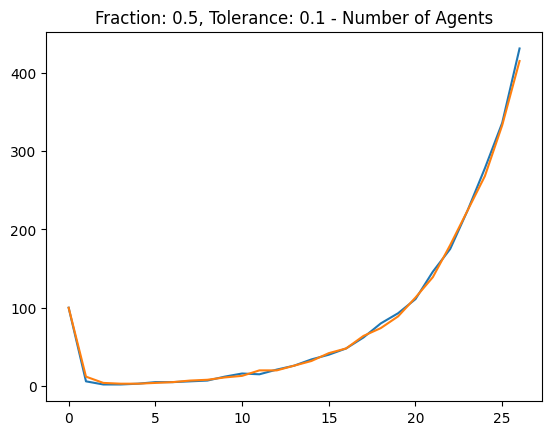

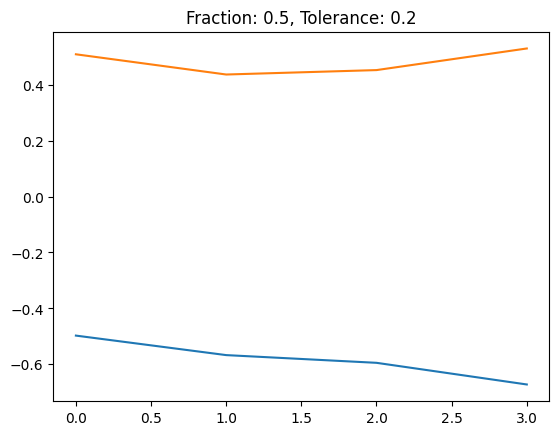

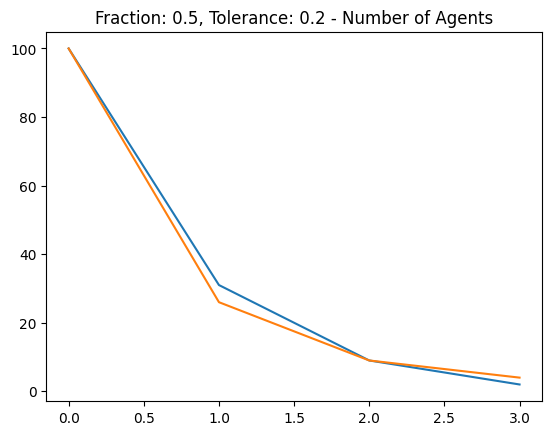

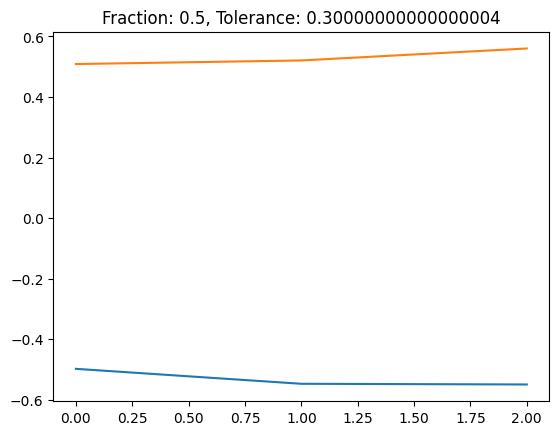

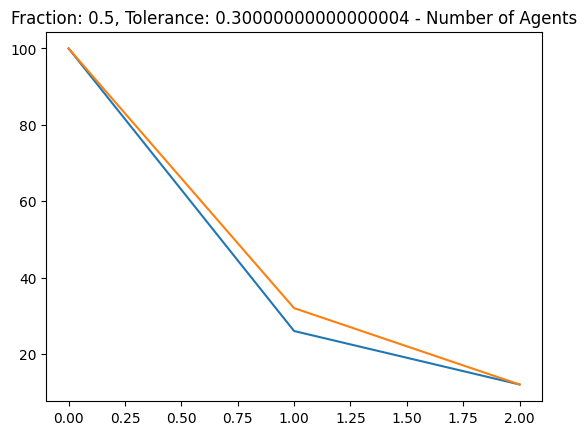

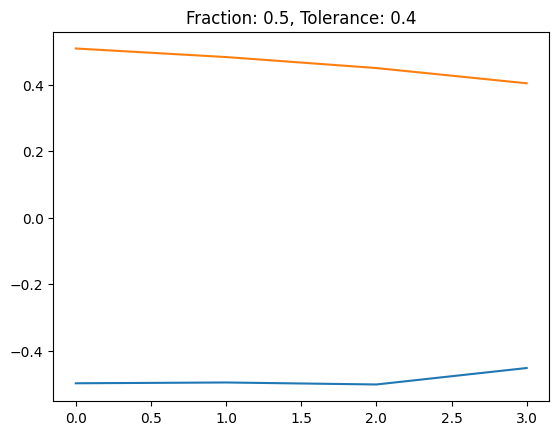

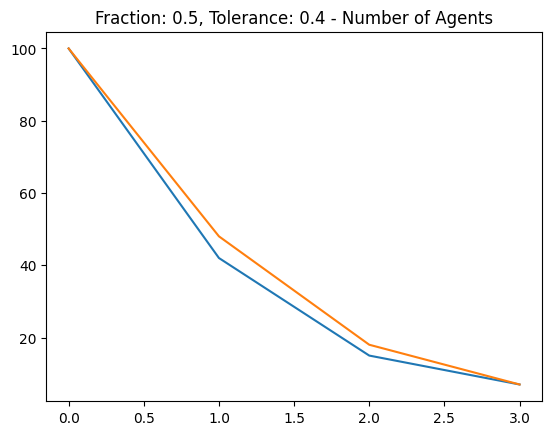

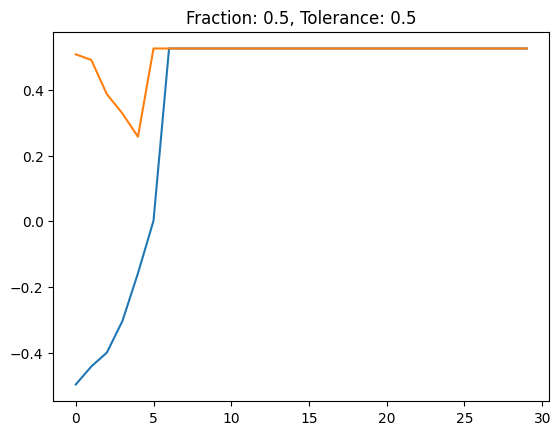

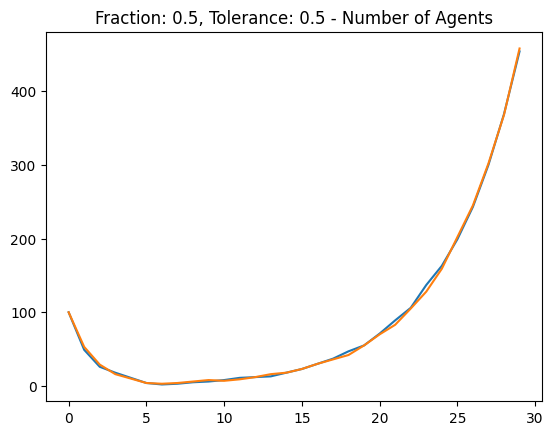

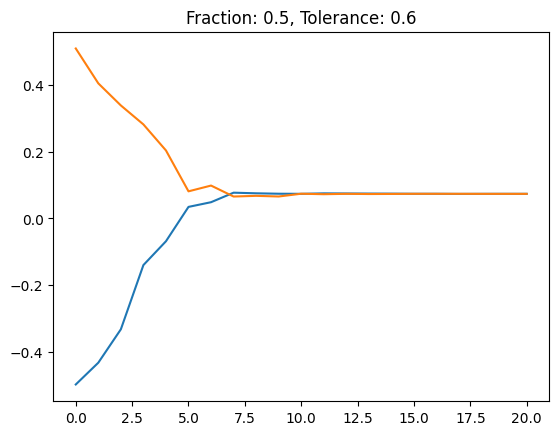

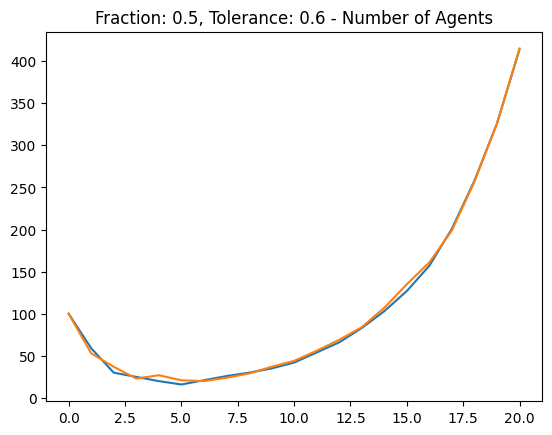

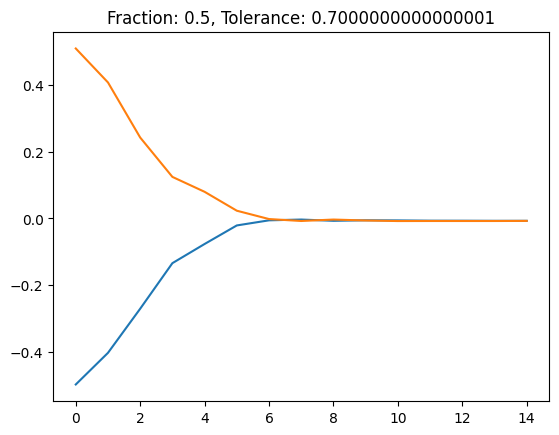

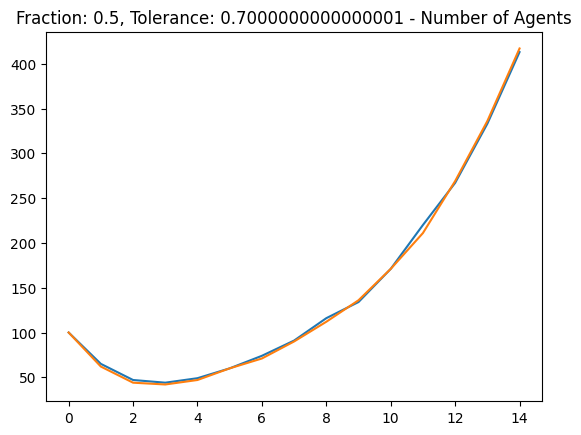

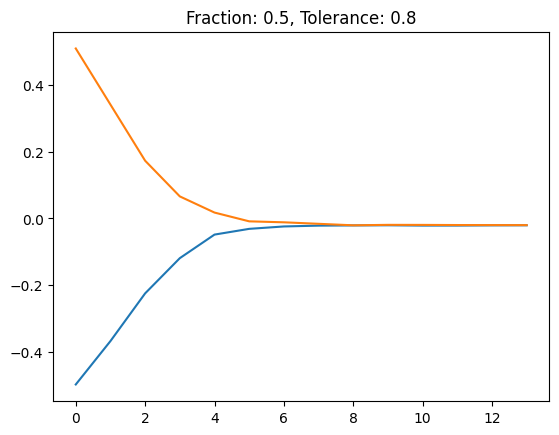

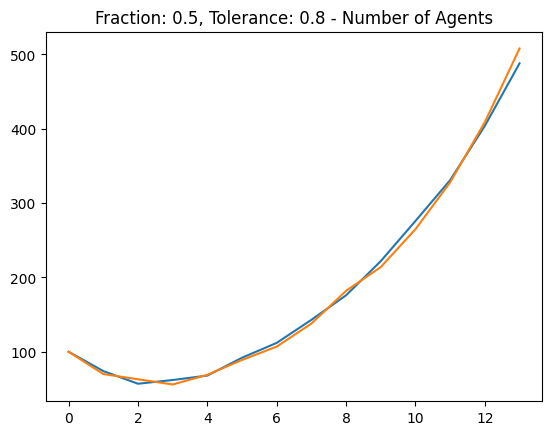

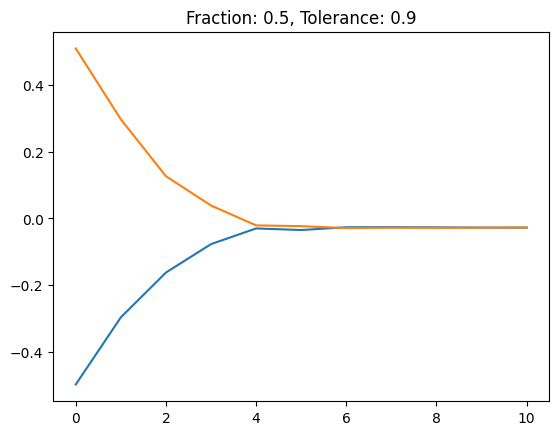

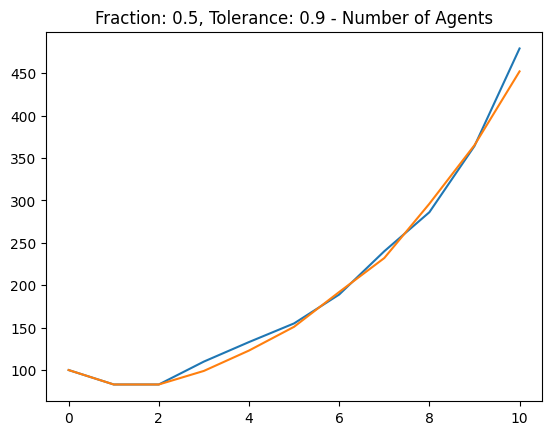

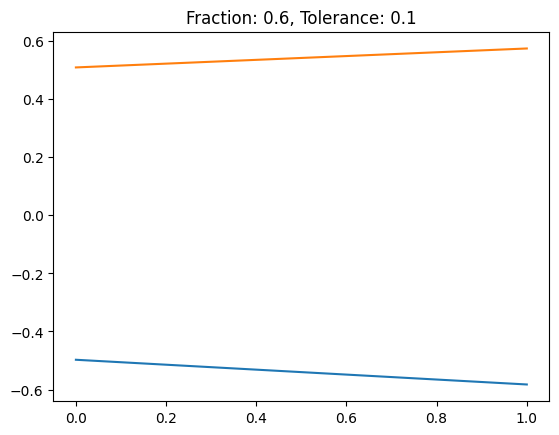

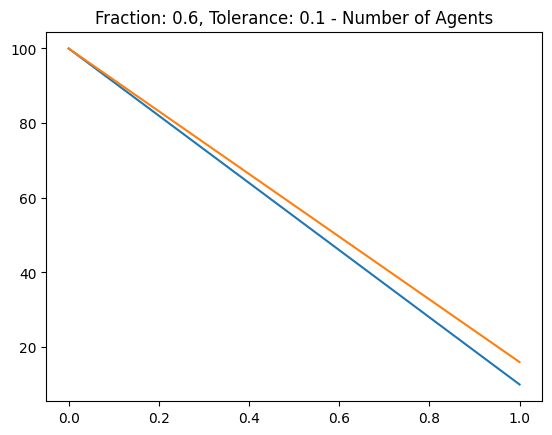

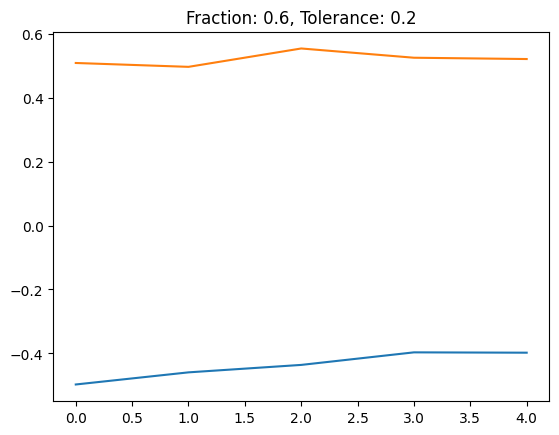

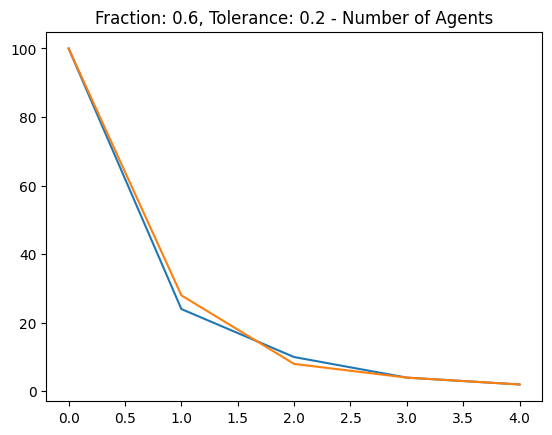

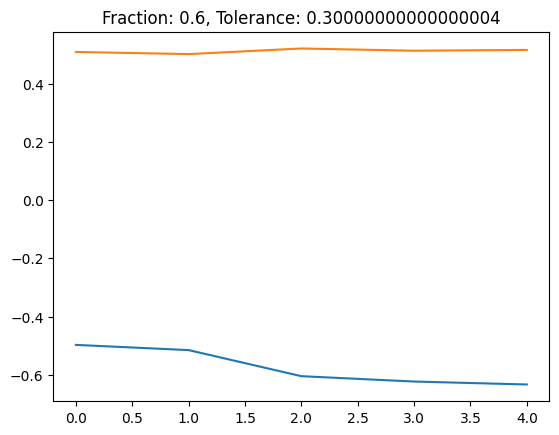

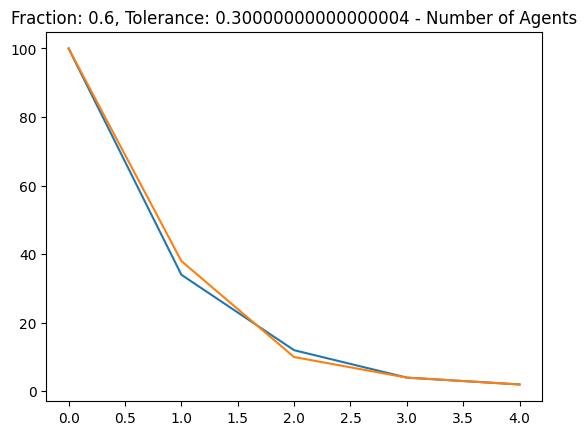

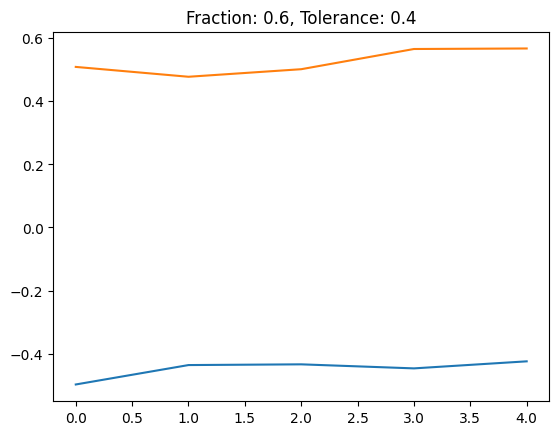

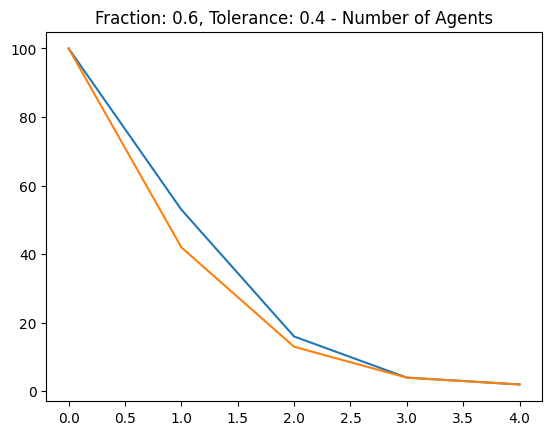

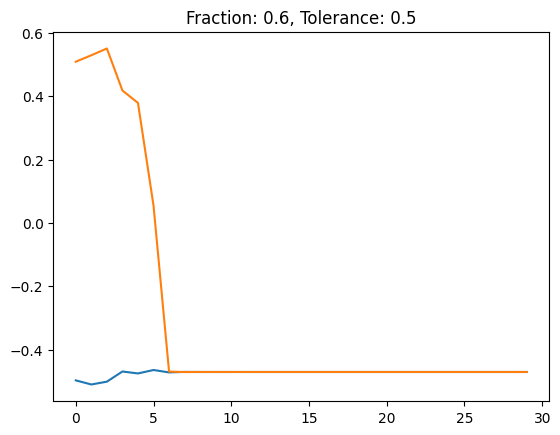

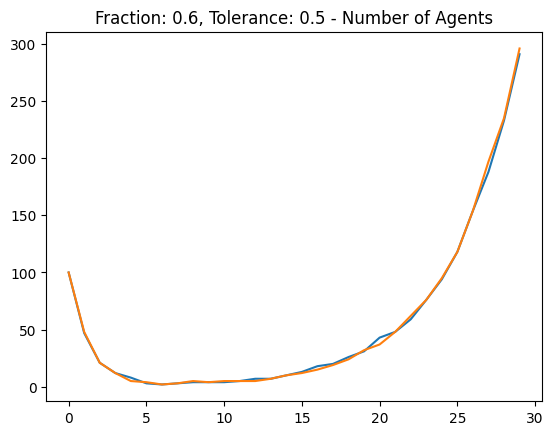

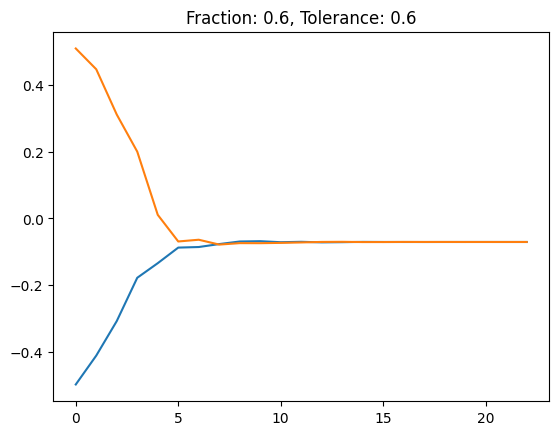

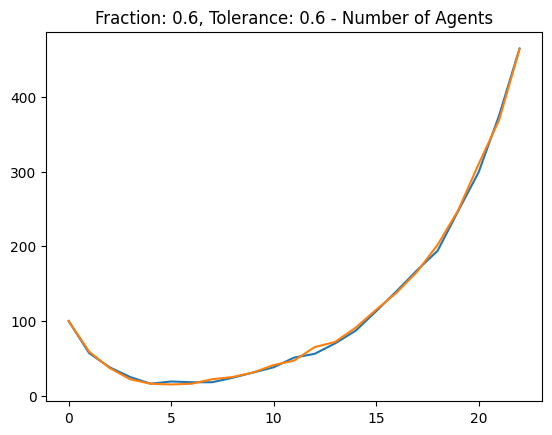

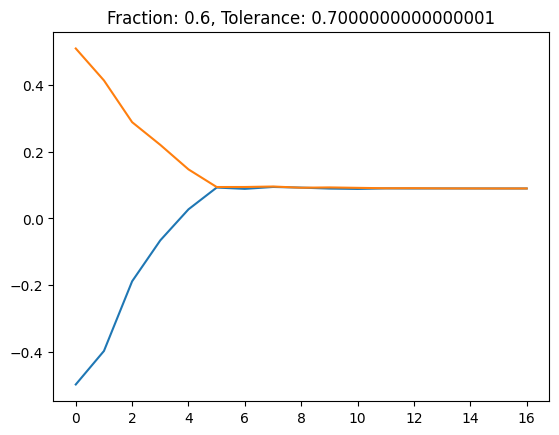

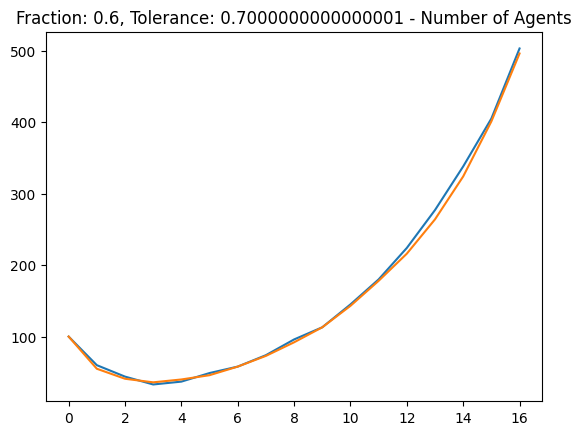

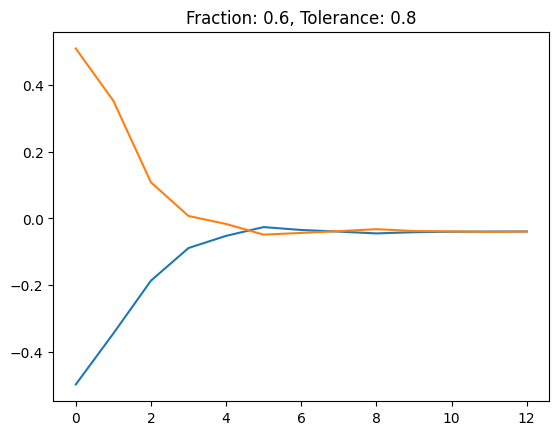

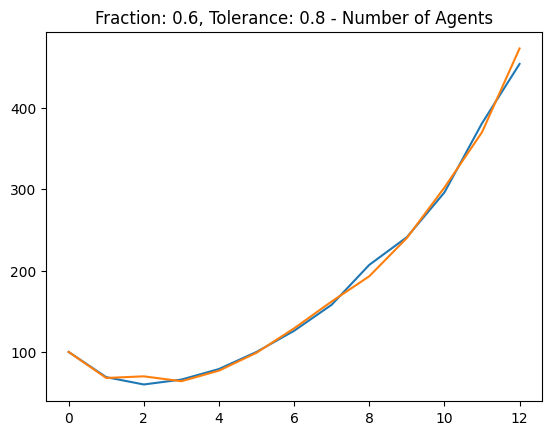

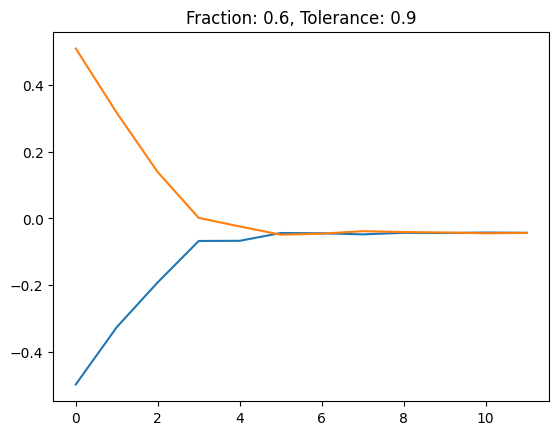

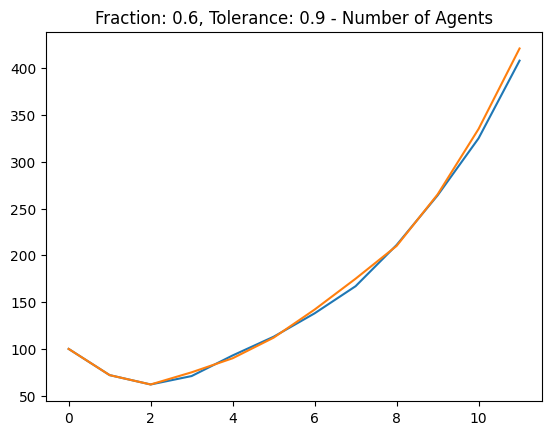

In [5]:
import matplotlib.pyplot as plt

for description_string, history in histories:
    numAAgents = [teamA.get_num_agents() for teamA, _ in history]
    numBAgents = [teamB.get_num_agents() for  _, teamB in history]
    teamAMeans = [teamA.get_mean_opinions() for teamA, _ in history]
    teamBMeans = [teamB.get_mean_opinions() for  _, teamB in history]
    plt.title(description_string)
    plt.plot(teamAMeans, label="Team A")
    plt.plot(teamBMeans, label="Team B")
    plt.show()
    plt.title(f'{description_string} - Number of Agents')
    plt.plot(numAAgents, label="Team A")
    plt.plot(numBAgents, label="Team B")
    plt.show()
    

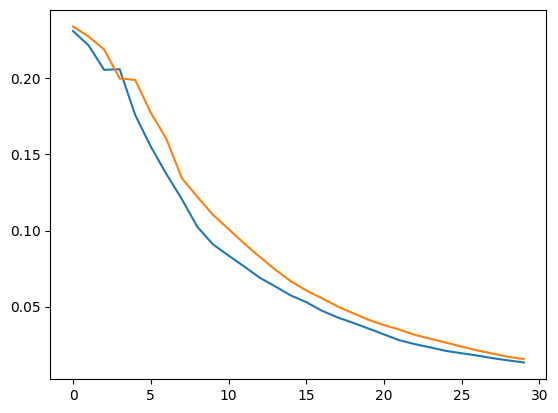

In [6]:
import matplotlib.pyplot as plt

teamAStdDevs = [teamA.get_std_dev_opinions() for teamA, _ in history]
teamBStdDevs = [teamB.get_std_dev_opinions() for  _, teamB in history]
plt.plot(teamAStdDevs, label="Team A")
plt.plot(teamBStdDevs, label="Team B")